# 5.lekce VIZUALIZACE seaborn 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Z minule lekce
food_sample_100 = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv")
food_other = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/sjednoceni-dat/food_other.csv")
food_nutrient = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv")
branded_food = pd.read_csv("https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv")

food = pd.concat([food_sample_100, food_other])
food_brands = pd.merge(food, branded_food, on="fdc_id")

food_brands["branded_food_category"] = food_brands["branded_food_category"].replace(
    {
        "Candy": "Cukrovinky",
        "Popcorn, Peanuts, Seeds & Related Snacks": "Slané snacky",
        "Cheese": "Sýry",
        "Ice Cream & Frozen Yogurt": "Zmrzlina",
        "Chips, Pretzels & Snacks": "Chipsy",
        "Cookies & Biscuits": "Sušenky",
        "Pickles, Olives, Peppers & Relishes": "Nakl. zelenina",
        "Breads & Buns": "Pečivo",
        "Fruit & Vegetable Juice, Nectars & Fruit Drinks": "Džusy",
        "Snack, Energy & Granola Bars": "En. tyčinky",
        "Chocolate": "Čokoláda",
        "Other Snacks": "Další snacky",
    }
)

food_merged_brands = pd.merge(food_brands, food_nutrient, on="fdc_id")
food_merged_brands = food_merged_brands.rename(columns={"name": "nutrient_name"})
food_merged_brands["nutrient_name"] = food_merged_brands["nutrient_name"].replace({"Total lipid (fat)": "Lipid (tuk)"})

food_list = [
    "Cukrovinky",
    "Slané snacky",
    "Sýry",
    "Zmrzlina",
    "Chipsy",
    "Sušenky",
    "Nakl. zelenina",
    "Pečivo",
    "Džusy",
    "En. tyčinky",
    "Čokoláda",
    "Další snacky",
]

# Filtrace záznamů v food_brands, kde sloupec 'branded_food_category' obsahuje hodnoty ze seznamu food_list
food_top_cat = food_brands[food_brands["branded_food_category"].isin(
    food_list)]

# Spojení vyfiltrovaného food_top_cat s food_nutrient na základě sloupce 'fdc_id'
food_brands_nut = pd.merge(food_top_cat, food_nutrient, on="fdc_id")

# Filtrace záznamů, kde 'nutrient_name' má hodnotu 'Protein'
food_merged_brands_protein = food_merged_brands[food_merged_brands["nutrient_name"] == "Protein"]

# Filtrace záznamů, kde 'nutrient_name' je buď 'Protein' nebo 'Lipid (tuk)', a kde 'branded_food_category' má hodnotu 'En. tyčinky'
food_merged_brands_box = food_merged_brands[
    (food_merged_brands["nutrient_name"].isin(["Protein", "Lipid (tuk)"]))
    & (food_merged_brands["branded_food_category"] == "En. tyčinky")
]

In [5]:
food_merged_brands_box.head(2)

,fdc_id,data_type,description,food_category_id,publication_date,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,...,data_points,derivation_id,min,max,median,loq,footnote,min_year_acquired,nutrient_name,unit_name
276,1109796,branded_food,"BAR, CHOCOLATE COCONUT CASHEW",NaN,2020-11-13,The Daily Record,NaN,NaN,838766080338,COMPLETE PROTEIN BLEND (ORGANIC SPROUTED WHOLE...,...,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,Lipid (tuk),G
277,1109796,branded_food,"BAR, CHOCOLATE COCONUT CASHEW",NaN,2020-11-13,The Daily Record,NaN,NaN,838766080338,COMPLETE PROTEIN BLEND (ORGANIC SPROUTED WHOLE...,...,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,Protein,G


In [6]:
food_top_cat[["fdc_id","description","branded_food_category"]]

,fdc_id,description,branded_food_category
2,1107295,"ORIGINAL ROUNDS TORTILLA CHIPS, ORIGINAL",Chipsy
3,1107475,"NACHO QUESO SUPREME DIP, NACHO QUESO SUPREME",Sýry
13,1109393,"HOMESTYLE PARMESAN-ROMANO GRATED CHEESE, HOMES...",Sýry
14,1109400,"WHITE CHUNK MACADAMIA SOFT BAKED COOKIES, WHIT...",Sušenky
15,1109434,"DRY ROASTED PEANUTS, DRY ROASTED",Slané snacky
...,...,...,...
9526,2659382,SRIRACHA & SCALLION BAGEL SHOP STYLE CREAM CHE...,Sýry
9530,2660573,"CUCUMBER DILL GOAT CHEESE DIP, CUCUMBER DILL G...",Sýry
9531,2660613,"DARK CHOCOLATE HIMALAYAN SALTED ALMONDS, DARK ...",Slané snacky
9535,2661380,PRETZEL MINI TWISTS,Chipsy


## countplot

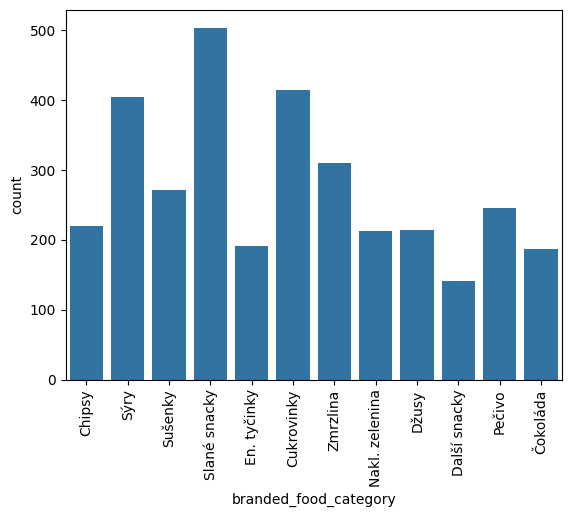

In [7]:
ax = sns.countplot(food_top_cat,x="branded_food_category")
ax.tick_params(axis='x', rotation = 90)

[Text(0.5, 1.0, 'Pocty potravin v kategoriich'),
 Text(0, 0.5, 'Popisek Y'),
 Text(0.5, 0, 'Popisek X')]

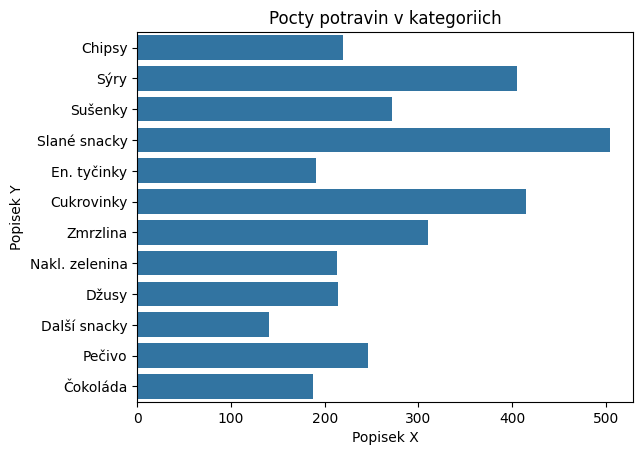

In [8]:
ax = sns.countplot(food_top_cat,y="branded_food_category")
ax.set(title='Pocty potravin v kategoriich',
       ylabel='Popisek Y',
       xlabel='Popisek X'
       )

## histogram

[Text(0.5, 1.0, 'Histogram')]

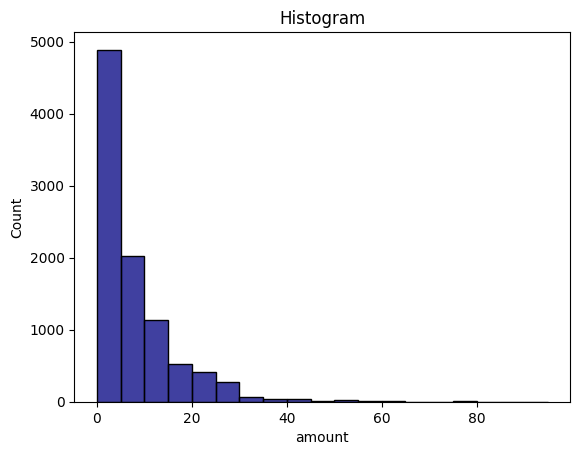

In [13]:
ax = sns.histplot(food_merged_brands_protein, 
                  x="amount",
                  bins = range(0,100,5),
                  color = "navy"
                  )
ax.set(title="Histogram")

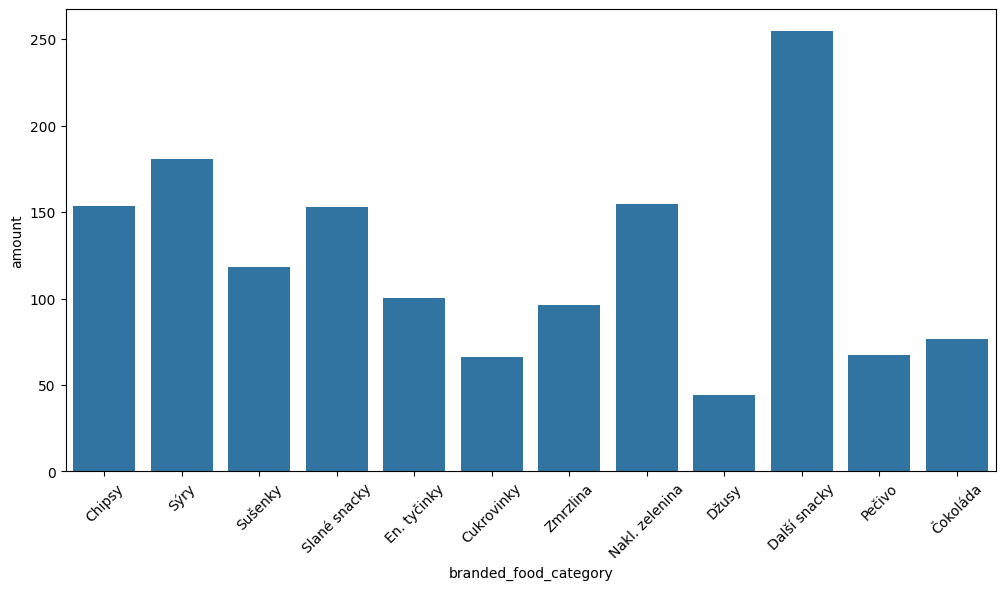

In [14]:
import matplotlib.pyplot as plt

# # Nastavení velikosti grafu
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=food_brands_nut,
    x="branded_food_category",
    y="amount",
    #  palette="Greens",
    #  hue="branded_food_category",
    errorbar=None,
)
# Nastavení parametrů os a názvu grafu
ax.tick_params(axis="x", rotation=45)

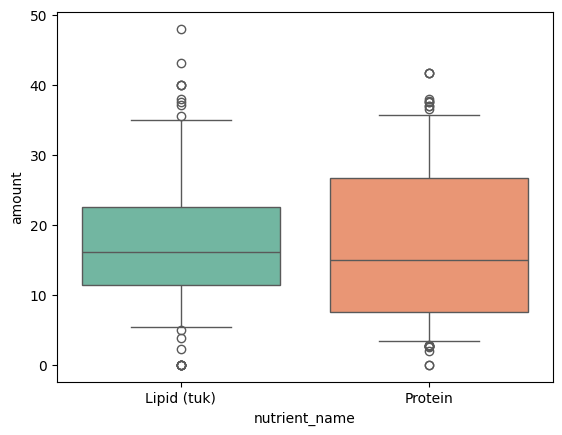

In [15]:
ax = sns.boxplot(food_merged_brands_box,
                 x="nutrient_name", 
                 y="amount", 
                 whis=[5, 95],
                #  color="blue",
                palette="Set2",
                hue="nutrient_name"
                 )

In [16]:
food_merged_brands_protein_lipid = food_merged_brands[food_merged_brands["nutrient_name"].isin(["Protein","Total lipid (fat)"])]
food_merged_brands_protein_lipid.columns

Index(['fdc_id', 'data_type', 'description', 'food_category_id',
       'publication_date', 'brand_owner', 'brand_name', 'subbrand_name',
       'gtin_upc', 'ingredients', 'not_a_significant_source_of',
       'serving_size', 'serving_size_unit', 'household_serving_fulltext',
       'branded_food_category', 'data_source', 'package_weight',
       'modified_date', 'available_date', 'market_country',
       'discontinued_date', 'preparation_state_code', 'trade_channel',
       'short_description', 'nutrient_id', 'amount', 'data_points',
       'derivation_id', 'min', 'max', 'median', 'loq', 'footnote',
       'min_year_acquired', 'nutrient_name', 'unit_name'],
      dtype='object')

<Axes: xlabel='amount', ylabel='Count'>

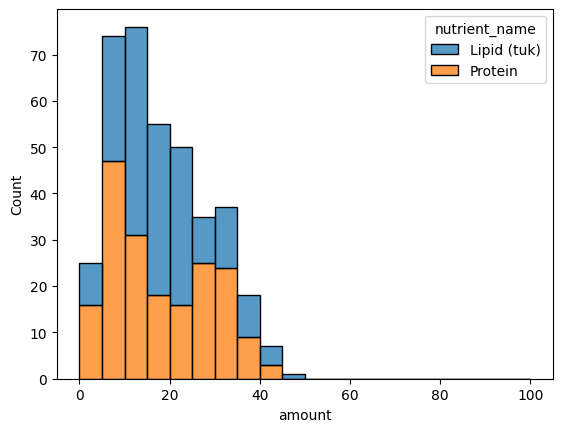

In [21]:
sns.histplot(food_merged_brands_box,
            x="amount",
            bins=range(0, 105, 5),
            hue="nutrient_name",
            multiple="stack"
)

In [1]:
food_merged_brands_protein_carb = food_merged_brands[
    food_merged_brands["nutrient_name"].isin(["Protein", "Carbohydrate, by difference"])]
food_merged_brands_protein_carb["nutrient_name"] = food_merged_brands_protein_carb["nutrient_name"].replace("Carbohydrate, by difference", "Karbohydráty")

ax = sns.catplot(
    data=food_merged_brands_protein_carb,
    x="branded_food_category",
    y="amount",
    hue="nutrient_name",
    s=2,
)
ax.tick_params(axis="x", rotation=45)
ax._legend.set_title("Výživná látka")


ax.set(
    xlabel="Kategorie",
    ylabel="Množství látky (g)",
    title="Množství výživných látek",
)

NameError: name 'food_merged_brands' is not defined